<a href="https://colab.research.google.com/github/IvanTolaba/PID/blob/main/Tp5_PID_Histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

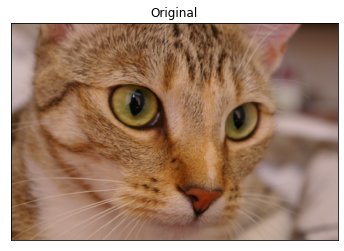

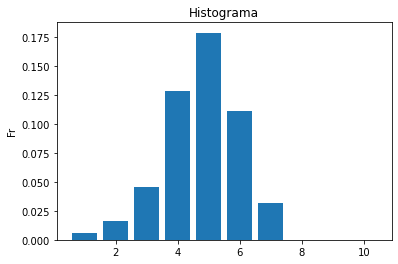

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


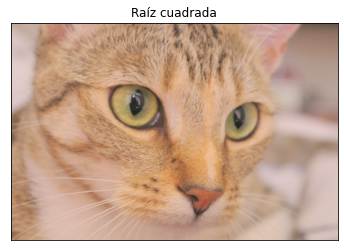

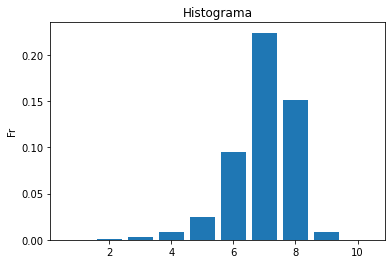

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


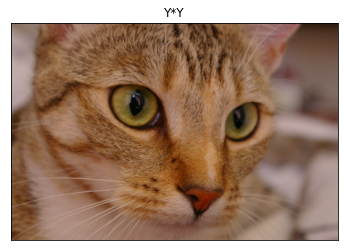

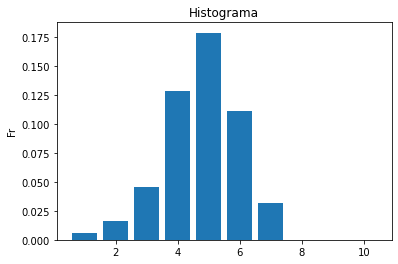

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


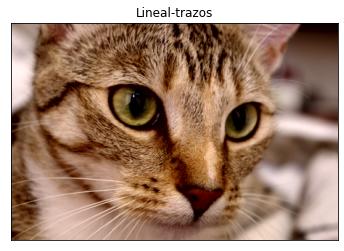

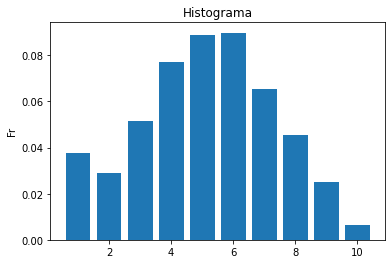

In [1]:
def rgb_to_yiq(rgb):
  import numpy as np 
  yiq=np.zeros(rgb.shape) 
  yiq[:,:,0]=0.229*rgb[:,:,0]+0.587*rgb[:,:,1]+0.114*rgb[:,:,2]
  yiq[:,:,1]=0.595716*rgb[:,:,0]-0.274453*rgb[:,:,1]-0.321263*rgb[:,:,2]
  yiq[:,:,2]=0.211456*rgb[:,:,0]-0.522591*rgb[:,:,1]+0.311135*rgb[:,:,2]
  return yiq


def yiq_rgb(yiq):
  import numpy as np 
  rgb=np.zeros(yiq.shape)
  rgb[:,:,0]=yiq[:,:,0]+0.9663*yiq[:,:,1]+0.6210*yiq[:,:,2]
  rgb[:,:,1]=yiq[:,:,0]-0.2721*yiq[:,:,1]-0.6474*yiq[:,:,2]
  rgb[:,:,2]=yiq[:,:,0]-1.1070*yiq[:,:,1]+1.7046*yiq[:,:,2]
  return rgb


def obtener_intervalo(yiq):
  import numpy as np 
  intervalo = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
  tamaño = 10
  for i in range(300):
    for j in range(451):
        
        if yiq[i,j,0] < 0.1:                               
           intervalo[0]=intervalo[0]+1
        
        elif (yiq[i,j,0]>=0.1) and (yiq[i,j,0]<0.2):
           intervalo[1]=intervalo[1]+1
        
        elif (yiq[i,j,0]>=0.2) and (yiq[i,j,0]<0.3):
           intervalo[2]=intervalo[2]+1

        elif (yiq[i,j,0]>=0.3) and (yiq[i,j,0]<0.4):
           intervalo[3]=intervalo[3]+1

        elif (yiq[i,j,0]>=0.4) and (yiq[i,j,0]<0.5):
           intervalo[4]=intervalo[4]+1

        elif (yiq[i,j,0]>=0.5) and (yiq[i,j,0]<0.6):
           intervalo[5]=intervalo[5]+1

        elif (yiq[i,j,0]>=0.6) and (yiq[i,j,0]<0.7):
           intervalo[6]=intervalo[6]+1

        elif (yiq[i,j,0]>=0.7) and (yiq[i,j,0]<0.8):
           intervalo[7]=intervalo[7]+1

        elif (yiq[i,j,0]>=0.8) and (yiq[i,j,0]<0.9):
           intervalo[8]=intervalo[8]+1  

        else:
           intervalo[9]=intervalo[9]+1  
  # frecuencia relativa         
  for i in range(tamaño):
    intervalo[i]=intervalo[i]/262144

  return intervalo


def crear_histograma(intervalo):
  import numpy as np 
  import matplotlib.pyplot as plt
  # Eje x
  eje_x = [1,2,3,4,5,6,7,8,9,10]
  fig, ax = plt.subplots()
  #Colocamos una etiqueta en el eje Y
  ax.set_ylabel('Fr')
  #Colocamos una etiqueta en el eje X
  ax.set_title('Histograma')
  #Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
  plt.bar(eje_x, intervalo)
  #plt.savefig('barras_simple.png')
  #Finalmente mostramos la grafica con el metodo show()
  
  plt.show()
  return ()


def lineal_trazos(yiq):
 import numpy as np 
 import matplotlib.pyplot as plt
 yiq_i=yiq   #dimensión 300*451
 x2=y_max=0.7
 x1=y_min=0.2
 y2=1
 y1=0
 #y_min=0.2
 #y_max=0.8
 for i in range(300):
    for j in range(451):
        if yiq_i[i,j,0] < y_min:                               
           yiq_i[i,j,0]=0
        
        elif yiq_i[i,j,0] > y_max: 
            yiq_i[i,j,0]=1
        else:
           yiq_i[i,j,0]=y1+((y2-y1)/(x2-x1))* (yiq_i[i,j,0]-x1)
 rgb_i= yiq_rgb(yiq_i)
 plt.figure(4)
 plt.imshow(rgb_i)
 plt.title('Lineal-trazos'),plt.xticks([]), plt.yticks([])
 #arreglo de 10 clases de frecuencias relativas
 intervalo_i=obtener_intervalo(yiq_i)
 #Histograma
 crear_histograma(intervalo_i)
 return ()

#****************************************
#************PROGRAMA PRINCIPAL**********
#****************************************

def main():
  import matplotlib.pyplot as plt
  import numpy as np
  import imageio

  #Imagen original
  rgb=imageio.imread('imageio:chelsea.png')/255.  #RGB normalizado [0,1] 
  plt.figure(0)
  plt.imshow(rgb),plt.title('Original'),plt.xticks([]), plt.yticks([])
  # RGB a YIQ
  yiq=rgb_to_yiq(rgb)  #dimensión 300*451
  #arreglo de 10 clases de frecuencias realtivas
  intervalo=obtener_intervalo(yiq)
  #Histograma  
  crear_histograma(intervalo)

  # Histograma por raíz cuadrada
  #desparrame el histogrma
  yiqr=yiq
  yiqr[:,:,0] = np.sqrt(yiqr[:,:,0])
  rgbr= yiq_rgb(yiqr)
  plt.figure(1)
  plt.imshow(rgbr)
  plt.title('Raíz cuadrada'),plt.xticks([]), plt.yticks([])
  #arreglo de 10 clases de frecuencias realtivas
  intervalo=obtener_intervalo(yiqr)
  #Histograma
  crear_histograma(intervalo)

  # Histograma por Y*Y
  #desparrame el histogrma
  yiqp=yiq
  #yiqp[:,:,0] = np.sqr(yiqp[:,:,0])
  yiqp[:,:,0] = yiqp[:,:,0]*yiqp[:,:,0]
  rgbp= yiq_rgb(yiqp)
  plt.figure(3)
  plt.imshow(rgbp)
  plt.title('Y*Y'),plt.xticks([]), plt.yticks([])
  #arreglo de 10 clases de frecuencias relativas
  intervalop=obtener_intervalo(yiqp)
  #Histograma
  crear_histograma(intervalop)

  # Histograma por lineal a trozos
  #desparrame el histogrma
  lineal_trazos(yiq)
  
  
       
if __name__ == '__main__':main()